# DSCI-554 Milestone 2 EDA

### Educational & Occupational Impact on Perception of Block Difficulty

#### Authors: Rayce Rossum, Ting Pan, Gopalakrishnan Andivel, Alex Hope

### Overview

Below you will find the data we collected, along with column transformations and visualizations of relevant variables we feel are important to this project. These primarily relate to education, employment, sex, age and block difficulty.

In [3]:
### Bring in some dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##### A little data preparation... I manually coded the faculties
## Read csv
data= pd.read_csv("../data/data.csv")
data = data.iloc[:,1:9]

In [9]:
### Numerics for Age/Sex/Block Difficulty
#### Sex variable
# No comment = 0, Male = 1, Female = 2
data['Sex'] = data['What is your sex?'].map({'Prefer not to say': 0,'Male':1,'Female':2})

### Age Variable
# 19-24 = 1, 25-29 = 2, 30-34 = 3, 35+ = 4
data['Age'] = data['Which age group do you belong to?'].map({'19-24':1,'25-29':2,'30-34':3,'35+':4})

#### Block Difficulty
# Block 4 = 1, Block 5 = 2
data['Block_Difficulty'] = data['Which block did you find more difficult?'].map({'Block 4 (January)': 1, 'Block 5 (February)': 2})
data.head(15)



,Faculty,Which faculty is your undergraduate degree from?,What is your undergraduate major?,Last_Job(Categorical),What was your last job?,Which age group do you belong to?,What is your sex?,Which block did you find more difficult?,Sex,Age,Block_Difficulty
0,1,Science,Computer Science,1,Software Developer,19-24,Male,Block 5 (February),1,1,2
1,2,Business,B.Comm,2,Analyst,25-29,Female,Block 4 (January),2,2,1
2,1,Science,Financial Math & Stat,2,Marketing,19-24,Female,Block 5 (February),2,1,2
3,1,Human and Social Development,Health Information Science,2,Product Analyst,35+,Male,Block 5 (February),1,4,2
4,2,Business,Commerce,1,Data Visualization Analyst,19-24,Female,Block 5 (February),2,1,2
5,3,Engineering (Applied Science),BS,0,No,25-29,Male,Block 5 (February),1,2,2
6,3,Engineering (Applied Science),Mechanical Enginering,2,Business Analyst,35+,Male,Block 4 (January),1,4,1
7,3,Engineering (Applied Science),Management Engineering,2,Product Manager,19-24,Female,Block 5 (February),2,1,2
8,2,Business,Mathematics,1,Actuary,25-29,Male,Block 4 (January),1,2,1
9,1,Science,Biological Sciences,0,None,19-24,Female,Block 5 (February),2,1,2


In [10]:
### Groupby Faculty Summary
data_groupby = data.groupby(['Faculty'])

### Honestly a straight summary table wasn't useful
data_groupby.describe()

Last_Job(Categorical)                                                \
                        count      mean       std  min   25%  50%  75%  max   
Faculty                                                                       
1                        26.0  2.769231  3.166167  0.0  1.00  2.0  2.0  9.0   
2                        10.0  1.700000  0.483046  1.0  1.25  2.0  2.0  2.0   
3                        17.0  1.529412  0.943242  0.0  1.00  1.0  2.0  3.0   
4                         5.0  4.600000  4.037326  1.0  2.00  2.0  9.0  9.0   

          Sex            ...  Age      Block_Difficulty                      \
        count      mean  ...  75%  max            count      mean       std   
Faculty                  ...                                                  
1        26.0  1.423077  ...  3.0  4.0             26.0  1.576923  0.503831   
2        10.0  1.200000  ...  2.0  2.0             10.0  1.600000  0.516398   
3        17.0  1.294118  ...  3.0  4.0             17.0  1.588235  0.507300   
4         5.0  1.400000  ...  3.0  4.0              5.0  1.600000  0.547723   

                                  
         min  25%  50%  75%  max  
Faculty                           
1        1.0  1.0  2.0  2.0  2.0  
2        1.0  1.0  2.0  2.0  2.0  
3        1.0  1.0  2.0  2.0  2.0  
4        1.0  1.0  2.0  2.0  2.0  

[4 rows x 32 columns]

## Variable Labels

- **Faculty**: 
    - Science = 1
    - Business = 2
    - Engineering = 3
    - Arts=4
<br>

- **Last_Job(Categorical)**:
    - Unemployed or N/A = 0
    - Science = 1
    - Business = 2
    - Engineering = 3
    - Arts = 4
<br>

- **Block_Difficulty**:
    - Block 4 = 1
    - Block 5 = 2
<br>

- **Age**:
    - 19-24 = 1
    - 25-29 = 2
    - 30-34 = 3
    - 35+ = 4
<br>

- **Biological Sex**:
    - Prefer not to say: 0
    - Male: 1
    - Female: 2

Text(0.5, 0, 'Biological Sex')

<Figure size 432x288 with 0 Axes>

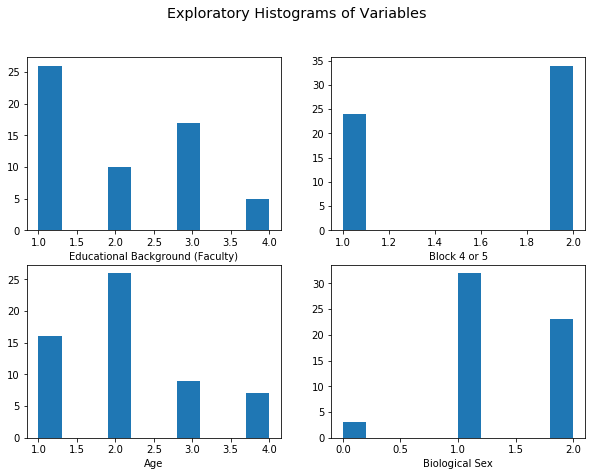

In [5]:
### Histogram Subplots


plt.figure(1)

fig = plt.figure(figsize=(10,7))
st = fig.suptitle("Exploratory Histograms of Variables",fontsize="x-large")
####### Some subplots
### Histogram of Faculty
ax1= fig.add_subplot(221)
plt.hist(data['Faculty'])
plt.xlabel("Educational Background (Faculty)")

### Histogram of Block Difficulty
ax2=fig.add_subplot(222)
plt.hist(data['Block_Difficulty'])
plt.xlabel("Block 4 or 5")

### Histogram of Age
ax3= fig.add_subplot(223)
plt.hist(data['Age'])
plt.xlabel("Age")

### Histogram of Sex
ax4= fig.add_subplot(224)
plt.hist(data['Sex'])
plt.xlabel('Biological Sex')

#fig.subplots_adjust(top = 0.75,bottom = 0.1)


#plt.subplots_adjust(left=1,right=2,top= 3,bottom = 1)


Histograms of `Faculty`, `Block_Difficulty`, `Age` and `Sex` reveals:
- More respondents were in the faculty of Science/Engineering than those in Business/Arts.
- For majority of respondents, block 5 tends to be tougher than block 4.
- There're more respondents from 19 to 29 than above 30.
- More male respondents than female, and outliers are who select "prefer not to say".

- **Potential Confounders**: 
    - Age
    - Sex

Let us stratify the Faculty and Last Job on variables `Age` and `Sex`

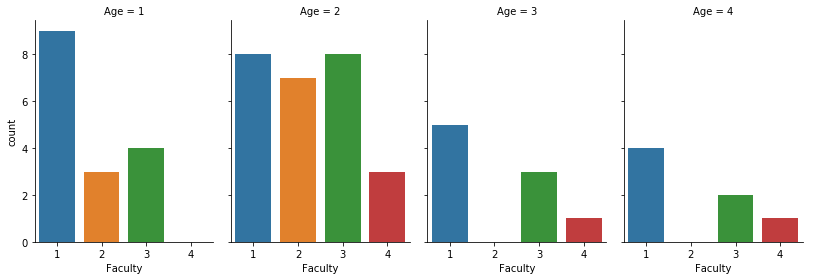

In [61]:
#### Stratified by Age on Faculty

sns.catplot(x="Faculty", col="Age",data=data, kind="count",height=4, aspect=.7);

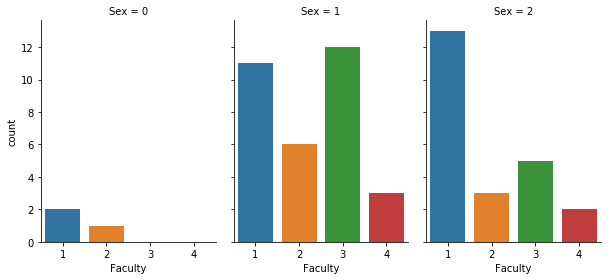

In [60]:
#### Stratified by Sex on Faculty

sns.catplot(x="Faculty", col="Sex",data=data, kind="count",height=4, aspect=.7);

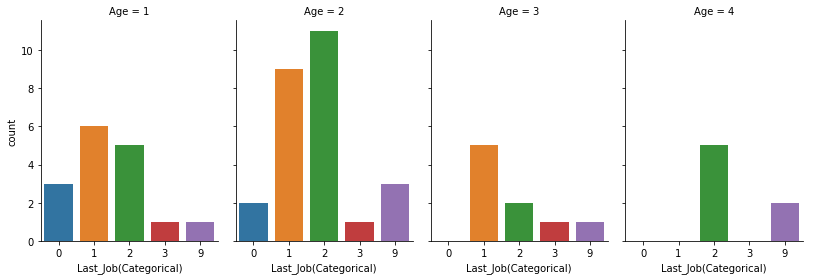

In [59]:
#### Stratified by Age on Last Job

sns.catplot(x="Last_Job(Categorical)", col="Age",data=data, kind="count",height=4, aspect=.7);

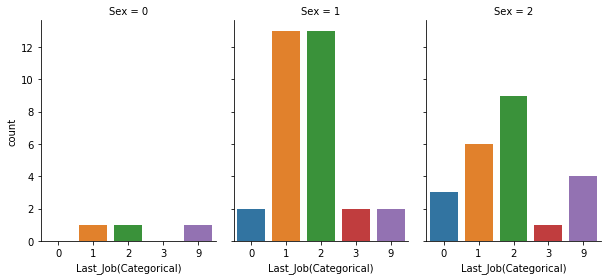

In [58]:
#### Stratified by Sex on Last Job

sns.catplot(x="Last_Job(Categorical)", col="Sex",data=data, kind="count",height=4, aspect=.7);

Startified histograms of `Last Job` and `Faculty` on `Age` and `Sex`suggests:
- There is not significant effect of `Age` and `Sex` on Last Job and Faculty

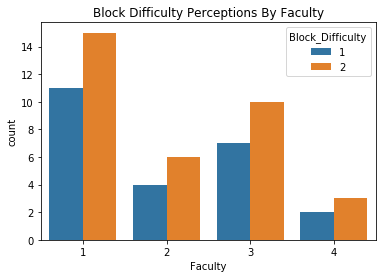

In [13]:
#### Plotting Interactions Between Variables
plt.title("Block Difficulty Perceptions By Faculty")
sns.countplot(data['Faculty'],hue=data['Block_Difficulty'])


- **Faculty**: 
    - Science = 1
    - Business = 2
    - Engineering = 3
    - Arts=4

Grouped histograms of `Faculty` and `Block_Difficulty` suggests:
- For all the faculty groups, our servey data skews block 5 to be more difficult than block 4. Also, the propotions are similar for each group.

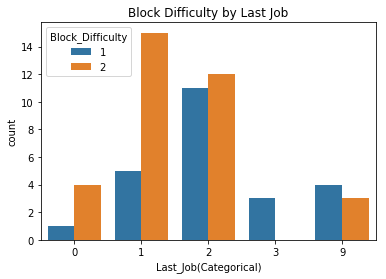

In [14]:
plt.title("Block Difficulty by Last Job")
sns.countplot(data['Last_Job(Categorical)'],hue=data['Block_Difficulty'])

- **Last_Job(Categorical)**:
    - Unemployed or N/A = 0
    - Science = 1
    - Business = 2
    - Engineering = 3
    - Arts = 4

Grouped histograms of `Last_Job` and `Block_Difficulty` suggests:
- For most respondents who have no working experience before or have last job related to Science/Business, block 5 is tougher than block 4. However, respondents with last job in Enginerring/Arts prefer to say block 4 is harder.

### Conclusion

- Here you can see differences in block difficulty perceptions based on a variety of variables. We intend to explore these effects further in future analyses, although the initial EDA has been quite useful in teasing effects apart as well!

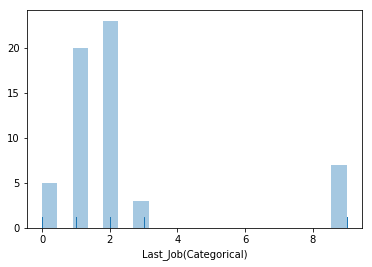

In [23]:
sns.distplot(data['Last_Job(Categorical)'], bins=20, kde=False, rug=True);


In [ ]:
# sex and block difficulty